# Project 1

## Import Libraries

In [19]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Create Data and Save as CSV File

> The analysis began by importing necessary Python libraries for data manipulation and visualization. A sample dataset was then created with information on airline, destination, on-time flights, and delayed flights. This data was written to a CSV file.

In [20]:
headers = ['Airline', 'Destination', 'On Time', 'Delayed']
data = [
    ["ALASKA", "Los Angeles", 497, 62],
    ["ALASKA", "Phoenix", 221, 12],
    ["ALASKA", "San Diego", 212, 20],
    ["ALASKA", "San Francisco", 503, 102],
    ["ALASKA", "Seattle", 1841, 305],
    ["AM WEST", "Los Angeles", 694, 117],
    ["AM WEST", "Phoenix", 4840, 415],
    ["AM WEST", "San Diego", 383, 65],
    ["AM WEST", "San Francisco", 320, 129],
    ["AM WEST", "Seattle", 201, 61]
]
with open('airline_delays.csv', 'w') as f:
    writer = csv.writer(f) 
    writer.writerow(headers)
    writer.writerows(data)

## Read Information from CSV

> The CSV file was read into a Pandas dataframe and summary statistics were calculated. This showed there were 10 records with averages of 971 on-time flights and 129 delayed flights.

In [21]:
# Read in data from csv 
df = pd.read_csv('airline_delays.csv')
print(df)

# Print summary statistics
print(df.describe())

   Airline    Destination  On Time  Delayed
0   ALASKA    Los Angeles      497       62
1   ALASKA        Phoenix      221       12
2   ALASKA      San Diego      212       20
3   ALASKA  San Francisco      503      102
4   ALASKA        Seattle     1841      305
5  AM WEST    Los Angeles      694      117
6  AM WEST        Phoenix     4840      415
7  AM WEST      San Diego      383       65
8  AM WEST  San Francisco      320      129
9  AM WEST        Seattle      201       61
           On Time     Delayed
count    10.000000   10.000000
mean    971.200000  128.800000
std    1443.280045  130.138217
min     201.000000   12.000000
25%     245.750000   61.250000
50%     440.000000   83.500000
75%     646.250000  126.000000
max    4840.000000  415.000000


## Perform Analysis

> Further analysis looked at the total number of flights and delays for each airline (Alaska and AM West). Alaska had 3,775 total flights with 501 delays. AM West had 7,225 total flights with 787 delays. The percentage of delayed flights was calculated for each airline - Alaska had 13.27% delays while AM West had 10.89%.

In [22]:
# Calculate total number of flights for each airline
total_flights_alaska = df[df['Airline'] == 'ALASKA'][['On Time', 'Delayed']].sum().sum()
print(f'Total number of flights for ALASKA: {total_flights_alaska}')
total_flights_amwest = df[df['Airline'] == 'AM WEST'][['On Time', 'Delayed']].sum().sum()
print(f'Total number of flights for AM WEST: {total_flights_amwest}')

# Calculate total number of delayed flights for each airline
total_delayed_alaska = df[df['Airline'] == 'ALASKA']['Delayed'].sum()
print(f'Total number of delayed flights for ALASKA: {total_delayed_alaska}')
total_delayed_amwest = df[df['Airline'] == 'AM WEST']['Delayed'].sum()
print(f'Total number of delayed flights for AM WEST: {total_delayed_amwest}')

# Calculate the percentage of delayed flights for each airline
percentage_delayed_alaska = (total_delayed_alaska / total_flights_alaska) * 100
print(f'Percentage of delayed flights for ALASKA: {percentage_delayed_alaska:.2f}%')
percentage_delayed_amwest = (total_delayed_amwest / total_flights_amwest) * 100
print(f'Percentage of delayed flights for AM WEST: {percentage_delayed_amwest:.2f}%')


Total number of flights for ALASKA: 3775
Total number of flights for AM WEST: 7225
Total number of delayed flights for ALASKA: 501
Total number of delayed flights for AM WEST: 787
Percentage of delayed flights for ALASKA: 13.27%
Percentage of delayed flights for AM WEST: 10.89%


## Charts

> Visualizations were created to better understand the data. A bar chart compared total delayed flights for each airline. This showed AM West had more total delays than Alaska, but Alaska had a higher percentage of delays out of their total flights. A pie chart was created to clearly demonstrate the percentage of delays for each airline.

### Bar Chart

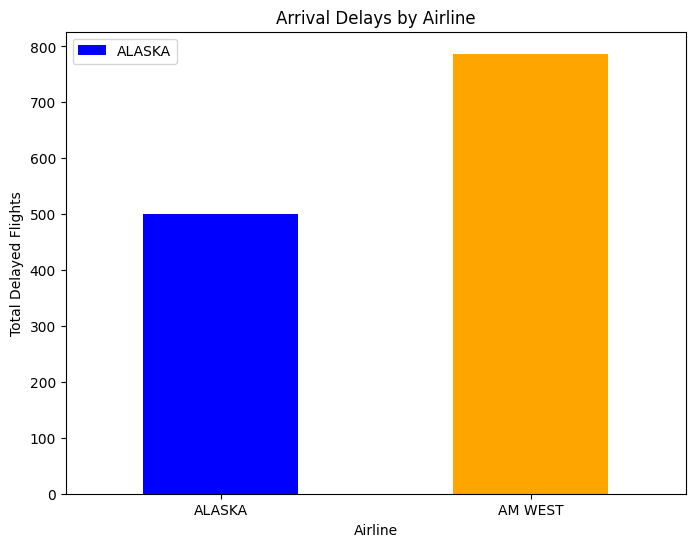

In [24]:

# Group the data by airline and sum the delays
airline_delays = df.groupby('Airline')['Delayed'].sum()

# Create a bar plot for arrival delays by airline
plt.figure(figsize=(8, 6))
airline_delays.plot(kind='bar', color=['blue', 'orange'])
plt.title('Arrival Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Delayed Flights')
plt.xticks(rotation=0)
plt.legend(['ALASKA', 'AM WEST'])
plt.show()

### Pie Chart

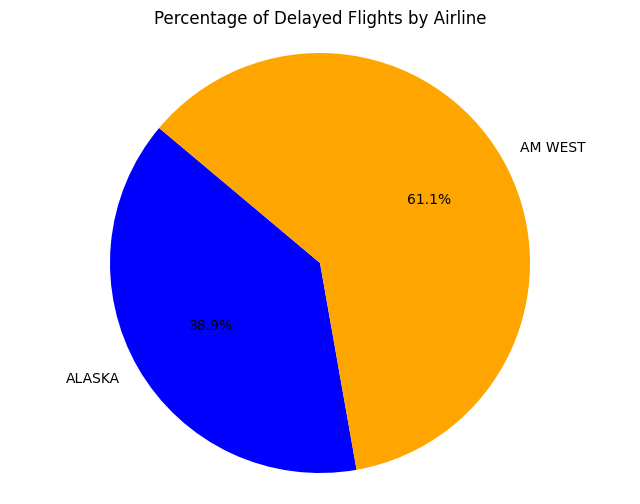

In [25]:
# Create a pie chart to show the percentage of delayed flights for each airline
plt.figure(figsize=(8, 6))
plt.pie(airline_delays, labels=airline_delays.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Percentage of Delayed Flights by Airline')
plt.axis('equal')
plt.show()

## Conclusion

> In conclusion, while AM West had more total delayed flights, Alaska had a higher percentage of their flights delayed at 13.27% compared to 10.89% for AM West. The analysis and visualizations helped compare the airlines' performance in terms of delayed flights.